# Database & Analytics Programming (MSCDAD_C)

# DATASET 01 - SEMI STRUCTURED DATA(JSON)

# Analysis of Data Science Field Salaries 

 The below performed dataset is about the employee salaries prediction based on the experience level and company size and location features

In [4]:
#Installing required Imports modules/library
from pymongo import MongoClient

import pymongo

from zipfile import * 

import pandas as pd 


# MongoDB, File parsing, ETL

In [5]:
#connectin mongoDB
ConnectionString = ("mongodb://localhost:27017/")
Client = MongoClient(ConnectionString)
db = Client.get_database('DAP_DB')
records = db.Q_DATASET    

In [6]:
# importing the required libraries
import pymongo
import pprint
import json
import warnings
warnings.filterwarnings('ignore')
from pymongo import MongoClient
import pandas as pd


client = pymongo.MongoClient("mongodb://localhost:27017/")
dblist = client.list_database_names()

print(dblist)

['DAP', 'admin', 'config', 'datascientistsalaries', 'db', 'local', 'semester01']


In [7]:
# database
mydb  = client["datascientistsalaries"]
  

mycol  = mydb["job salaries"]

In [8]:
mydb

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'datascientistsalaries')

In [9]:
mycol

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'datascientistsalaries'), 'job salaries')

In [10]:
import json

def file_json_parser(file_path):
    try:
        with open(file_path, 'r') as file:
            json_data = json.load(file)
            return json_data
    except FileNotFoundError:
        print(f"Given File not available: {file_path}")
    except IOError:
        print(f"Unable to read from given file: {file_path}")
    except json.JSONDecodeError:
        print(f"Unable to decode JSON from the file: {file_path}")
    finally:
        print("File parsing complete")


path=r'C:\Users\aarth\OneDrive\Desktop\DAP\semi_json.json'
# Assuming 'example.json' contains a valid JSON object (e.g., {"key": "value"})
salaries_data = file_json_parser(path)
print('Parsed Data:', salaries_data)

File parsing complete
Parsed Data: [{'work_year': '2023', 'experience_level': 'EX', 'employment_type': 'FT', 'job_title': 'Data Science Director', 'salary': '212000', 'salary_currency': 'USD', 'salary_in_usd': '212000', 'employee_residence': 'US', 'remote_ratio': 0, 'company_location': 'US', 'company_size': 'M'}, {'work_year': '2023', 'experience_level': 'EX', 'employment_type': 'FT', 'job_title': 'Data Science Director', 'salary': '190000', 'salary_currency': 'USD', 'salary_in_usd': '190000', 'employee_residence': 'US', 'remote_ratio': 0, 'company_location': 'US', 'company_size': 'M'}, {'work_year': '2023', 'experience_level': 'MI', 'employment_type': 'FT', 'job_title': 'Business Intelligence Engineer', 'salary': '35000', 'salary_currency': 'GBP', 'salary_in_usd': '43064', 'employee_residence': 'GB', 'remote_ratio': 0, 'company_location': 'GB', 'company_size': 'M'}, {'work_year': '2023', 'experience_level': 'MI', 'employment_type': 'FT', 'job_title': 'Business Intelligence Engineer', 

In [11]:

db = client['datascientistsalaries']
collection_Q = db['job salaries'] 
Q_df = pd.DataFrame(list(collection_Q.find())) 
Q_df.shape

(8805, 12)

In [12]:

Q_df

,_id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,657a1ce8a4f52c0babd77201,2023,EX,FT,Data Science Director,212000,USD,212000,US,0,US,M
1,657a1ce8a4f52c0babd77202,2023,EX,FT,Data Science Director,190000,USD,190000,US,0,US,M
2,657a1ce8a4f52c0babd77203,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
3,657a1ce8a4f52c0babd77204,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
4,657a1ce8a4f52c0babd77205,2023,SE,FT,Machine Learning Engineer,245700,USD,245700,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...,...
8800,657a1ce9a4f52c0babd79461,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
8801,657a1ce9a4f52c0babd79462,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
8802,657a1ce9a4f52c0babd79463,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
8803,657a1ce9a4f52c0babd79464,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [13]:
missing_values = Q_df.isnull().sum()
print("Missing Values in my Dataframe Q df:")
print(missing_values)

Missing Values in my Dataframe Q df:
_id                   0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [14]:
# Remove the 'Salary and Salary_currency' column
columns_to_remove = ['salary', 'salary_currency']
new_df = Q_df.drop(columns=columns_to_remove)

# Display the DF after removing the 'salary_currency' column
print(f"\nDataFrame after removing columns: {columns_to_remove}")
print(new_df)



DataFrame after removing columns: ['salary', 'salary_currency']
                           _id work_year experience_level employment_type  \
0     657a1ce8a4f52c0babd77201      2023               EX              FT   
1     657a1ce8a4f52c0babd77202      2023               EX              FT   
2     657a1ce8a4f52c0babd77203      2023               MI              FT   
3     657a1ce8a4f52c0babd77204      2023               MI              FT   
4     657a1ce8a4f52c0babd77205      2023               SE              FT   
...                        ...       ...              ...             ...   
8800  657a1ce9a4f52c0babd79461      2020               SE              FT   
8801  657a1ce9a4f52c0babd79462      2021               MI              FT   
8802  657a1ce9a4f52c0babd79463      2020               EN              FT   
8803  657a1ce9a4f52c0babd79464      2020               EN              CT   
8804  657a1ce9a4f52c0babd79465      2021               SE              FT   

          

In [15]:
#checking dupliate rows
duplicate_rows = new_df[new_df.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [_id, work_year, experience_level, employment_type, job_title, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []


In [16]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [17]:
 #Set up PostgreSQL connection
import psycopg2
from sqlalchemy import create_engine
from bson import ObjectId 
postgre_creds = {
    'user': 'postgres',
    'password': 'abil123',
    'host': 'localhost',
    'port': '5432',
    'database': 'analysis'
}
connect = psycopg2.connect(**postgre_creds)

table_name = 'jsondata'
new_df['_id'] = new_df['_id'].astype(str)
engine = create_engine(f"postgresql+psycopg2://{postgre_creds['user']}:{postgre_creds['password']}@{postgre_creds['host']}:{postgre_creds['port']}/{postgre_creds['database']}")
new_df.to_sql(table_name, engine, index=False, if_exists='replace')
updated_dataa = pd.read_sql_table(table_name, engine)
updated_dataa
 

,_id,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,657a1ce8a4f52c0babd77201,2023,EX,FT,Data Science Director,212000,US,0,US,M
1,657a1ce8a4f52c0babd77202,2023,EX,FT,Data Science Director,190000,US,0,US,M
2,657a1ce8a4f52c0babd77203,2023,MI,FT,Business Intelligence Engineer,43064,GB,0,GB,M
3,657a1ce8a4f52c0babd77204,2023,MI,FT,Business Intelligence Engineer,43064,GB,0,GB,M
4,657a1ce8a4f52c0babd77205,2023,SE,FT,Machine Learning Engineer,245700,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...
8800,657a1ce9a4f52c0babd79461,2020,SE,FT,Data Scientist,412000,US,100,US,L
8801,657a1ce9a4f52c0babd79462,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
8802,657a1ce9a4f52c0babd79463,2020,EN,FT,Data Scientist,105000,US,100,US,S
8803,657a1ce9a4f52c0babd79464,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


# EDA

In [18]:
new_df.shape

(8805, 10)

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8805 entries, 0 to 8804
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 8805 non-null   object
 1   work_year           8805 non-null   object
 2   experience_level    8805 non-null   object
 3   employment_type     8805 non-null   object
 4   job_title           8805 non-null   object
 5   salary_in_usd       8805 non-null   object
 6   employee_residence  8805 non-null   object
 7   remote_ratio        8805 non-null   int64 
 8   company_location    8805 non-null   object
 9   company_size        8805 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.0+ KB


In [20]:
new_df["work_year"].value_counts()

2023    6861
2022    1651
2021     218
2020      75
Name: work_year, dtype: int64

In [21]:
new_df["experience_level"].value_counts()

SE    6336
MI    1732
EN     468
EX     269
Name: experience_level, dtype: int64

In [22]:
new_df["employment_type"].value_counts()

FT    8762
CT      18
PT      13
FL      12
Name: employment_type, dtype: int64

In [23]:
new_df.describe()

,remote_ratio
count,8805.000000
mean,38.693924
std,48.068060
min,0.000000
25%,0.000000
50%,0.000000
75%,100.000000
max,100.000000


In [24]:
new_df.dtypes

_id                   object
work_year             object
experience_level      object
employment_type       object
job_title             object
salary_in_usd         object
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [25]:
new_df.nunique()

_id                   8805
work_year                4
experience_level         4
employment_type          4
job_title              124
salary_in_usd         1768
employee_residence      86
remote_ratio             3
company_location        74
company_size             3
dtype: int64

In [26]:
new_df

,_id,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,657a1ce8a4f52c0babd77201,2023,EX,FT,Data Science Director,212000,US,0,US,M
1,657a1ce8a4f52c0babd77202,2023,EX,FT,Data Science Director,190000,US,0,US,M
2,657a1ce8a4f52c0babd77203,2023,MI,FT,Business Intelligence Engineer,43064,GB,0,GB,M
3,657a1ce8a4f52c0babd77204,2023,MI,FT,Business Intelligence Engineer,43064,GB,0,GB,M
4,657a1ce8a4f52c0babd77205,2023,SE,FT,Machine Learning Engineer,245700,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...
8800,657a1ce9a4f52c0babd79461,2020,SE,FT,Data Scientist,412000,US,100,US,L
8801,657a1ce9a4f52c0babd79462,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
8802,657a1ce9a4f52c0babd79463,2020,EN,FT,Data Scientist,105000,US,100,US,S
8803,657a1ce9a4f52c0babd79464,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [27]:
new_dfh = new_df.copy()
new_dfh

,_id,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,657a1ce8a4f52c0babd77201,2023,EX,FT,Data Science Director,212000,US,0,US,M
1,657a1ce8a4f52c0babd77202,2023,EX,FT,Data Science Director,190000,US,0,US,M
2,657a1ce8a4f52c0babd77203,2023,MI,FT,Business Intelligence Engineer,43064,GB,0,GB,M
3,657a1ce8a4f52c0babd77204,2023,MI,FT,Business Intelligence Engineer,43064,GB,0,GB,M
4,657a1ce8a4f52c0babd77205,2023,SE,FT,Machine Learning Engineer,245700,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...
8800,657a1ce9a4f52c0babd79461,2020,SE,FT,Data Scientist,412000,US,100,US,L
8801,657a1ce9a4f52c0babd79462,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
8802,657a1ce9a4f52c0babd79463,2020,EN,FT,Data Scientist,105000,US,100,US,S
8803,657a1ce9a4f52c0babd79464,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [29]:
new_dfh['job_title'] =new_dfh['job_title'].astype('category')
new_dfh['job_title'] =new_dfh['job_title'].cat.codes
new_dfh['experience_level'] =new_dfh['experience_level'].astype('category')
new_dfh['experience_level'] =new_dfh['experience_level'].cat.codes
new_dfh['employment_type'] =new_dfh['employment_type'].astype('category')
new_dfh['employment_type'] =new_dfh['employment_type'].cat.codes
new_dfh['company_size'] =new_dfh['company_size'].astype('category')
new_dfh['company_size'] =new_dfh['company_size'].cat.codes
new_dfh['company_location'] =new_dfh['company_location'].astype('category')
new_dfh['company_location'] =new_dfh['company_location'].cat.codes
new_dfh


,_id,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,657a1ce8a4f52c0babd77201,2023,1,2,62,212000,US,0,72,1
1,657a1ce8a4f52c0babd77202,2023,1,2,62,190000,US,0,72,1
2,657a1ce8a4f52c0babd77203,2023,2,2,26,43064,GB,0,27,1
3,657a1ce8a4f52c0babd77204,2023,2,2,26,43064,GB,0,27,1
4,657a1ce8a4f52c0babd77205,2023,3,2,95,245700,US,0,72,1
...,...,...,...,...,...,...,...,...,...,...
8800,657a1ce9a4f52c0babd79461,2020,3,2,68,412000,US,100,72,0
8801,657a1ce9a4f52c0babd79462,2021,2,2,113,151000,US,100,72,0
8802,657a1ce9a4f52c0babd79463,2020,0,2,68,105000,US,100,72,2
8803,657a1ce9a4f52c0babd79464,2020,0,0,21,100000,US,100,72,0


# Visualization 

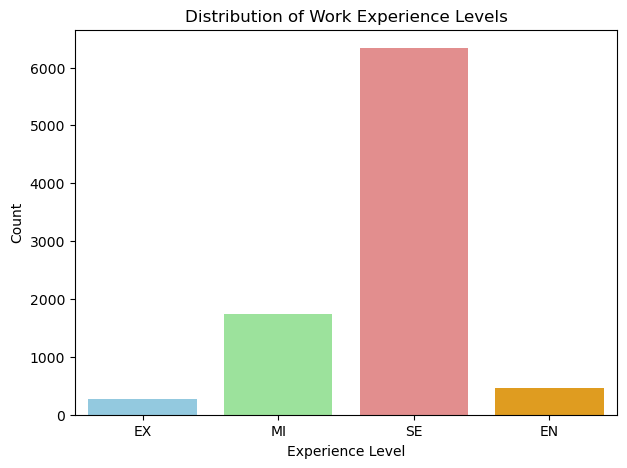

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(7, 5))
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange']
sns.countplot(data=new_df, x='experience_level', palette=colors)
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Distribution of Work Experience Levels')
plt.show()

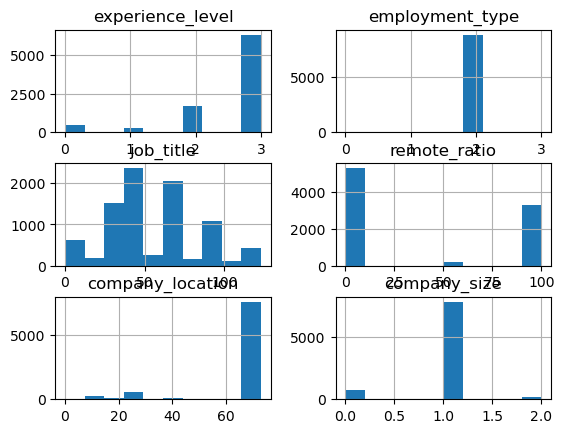

In [32]:
new_dfh.hist()
plt.show()

In [83]:

print("Total value counts of the roles:-\n ",new_df["experience_level"].value_counts())

Total value counts of the roles:-
  SE    6336
MI    1732
EN     468
EX     269
Name: experience_level, dtype: int64


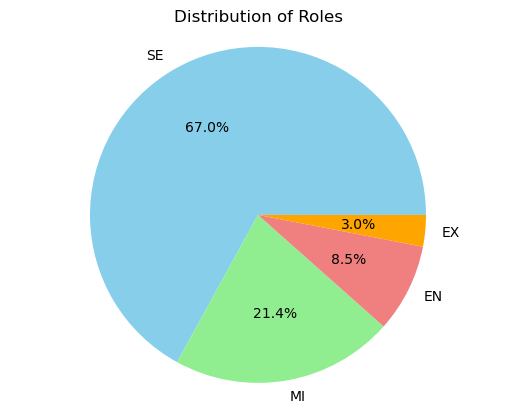

In [84]:
roles = ["SE", "MI", "EN", "EX"]
people = [2516, 805, 320, 114]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange']
plt.pie(people, labels=roles, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Roles')
plt.axis('equal')
plt.show()

In [85]:
new_df["company_size"].value_counts()

M    7881
L     756
S     168
Name: company_size, dtype: int64

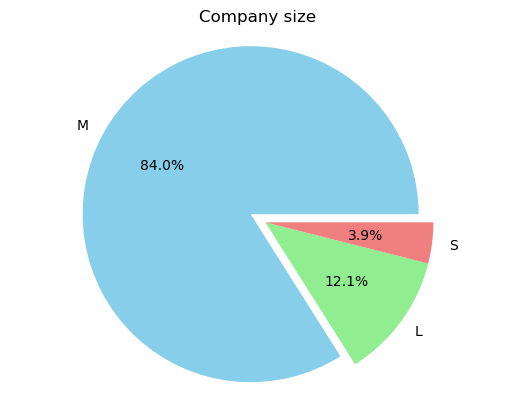

In [86]:
company_numbers = [3153, 454, 148]
company_size = ["M", "L", "S"]
explode = [0.1, 0, 0]  
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange']
plt.pie(company_numbers, labels=company_size, explode=explode, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title("Company size")
plt.show()

In [87]:
new_df["job_title"].value_counts()

Data Engineer                     2062
Data Scientist                    1852
Data Analyst                      1322
Machine Learning Engineer          908
Applied Scientist                  258
                                  ... 
Deep Learning Researcher             1
Consultant Data Engineer             1
BI Data Engineer                     1
Managing Director Data Science       1
AWS Data Architect                   1
Name: job_title, Length: 124, dtype: int64

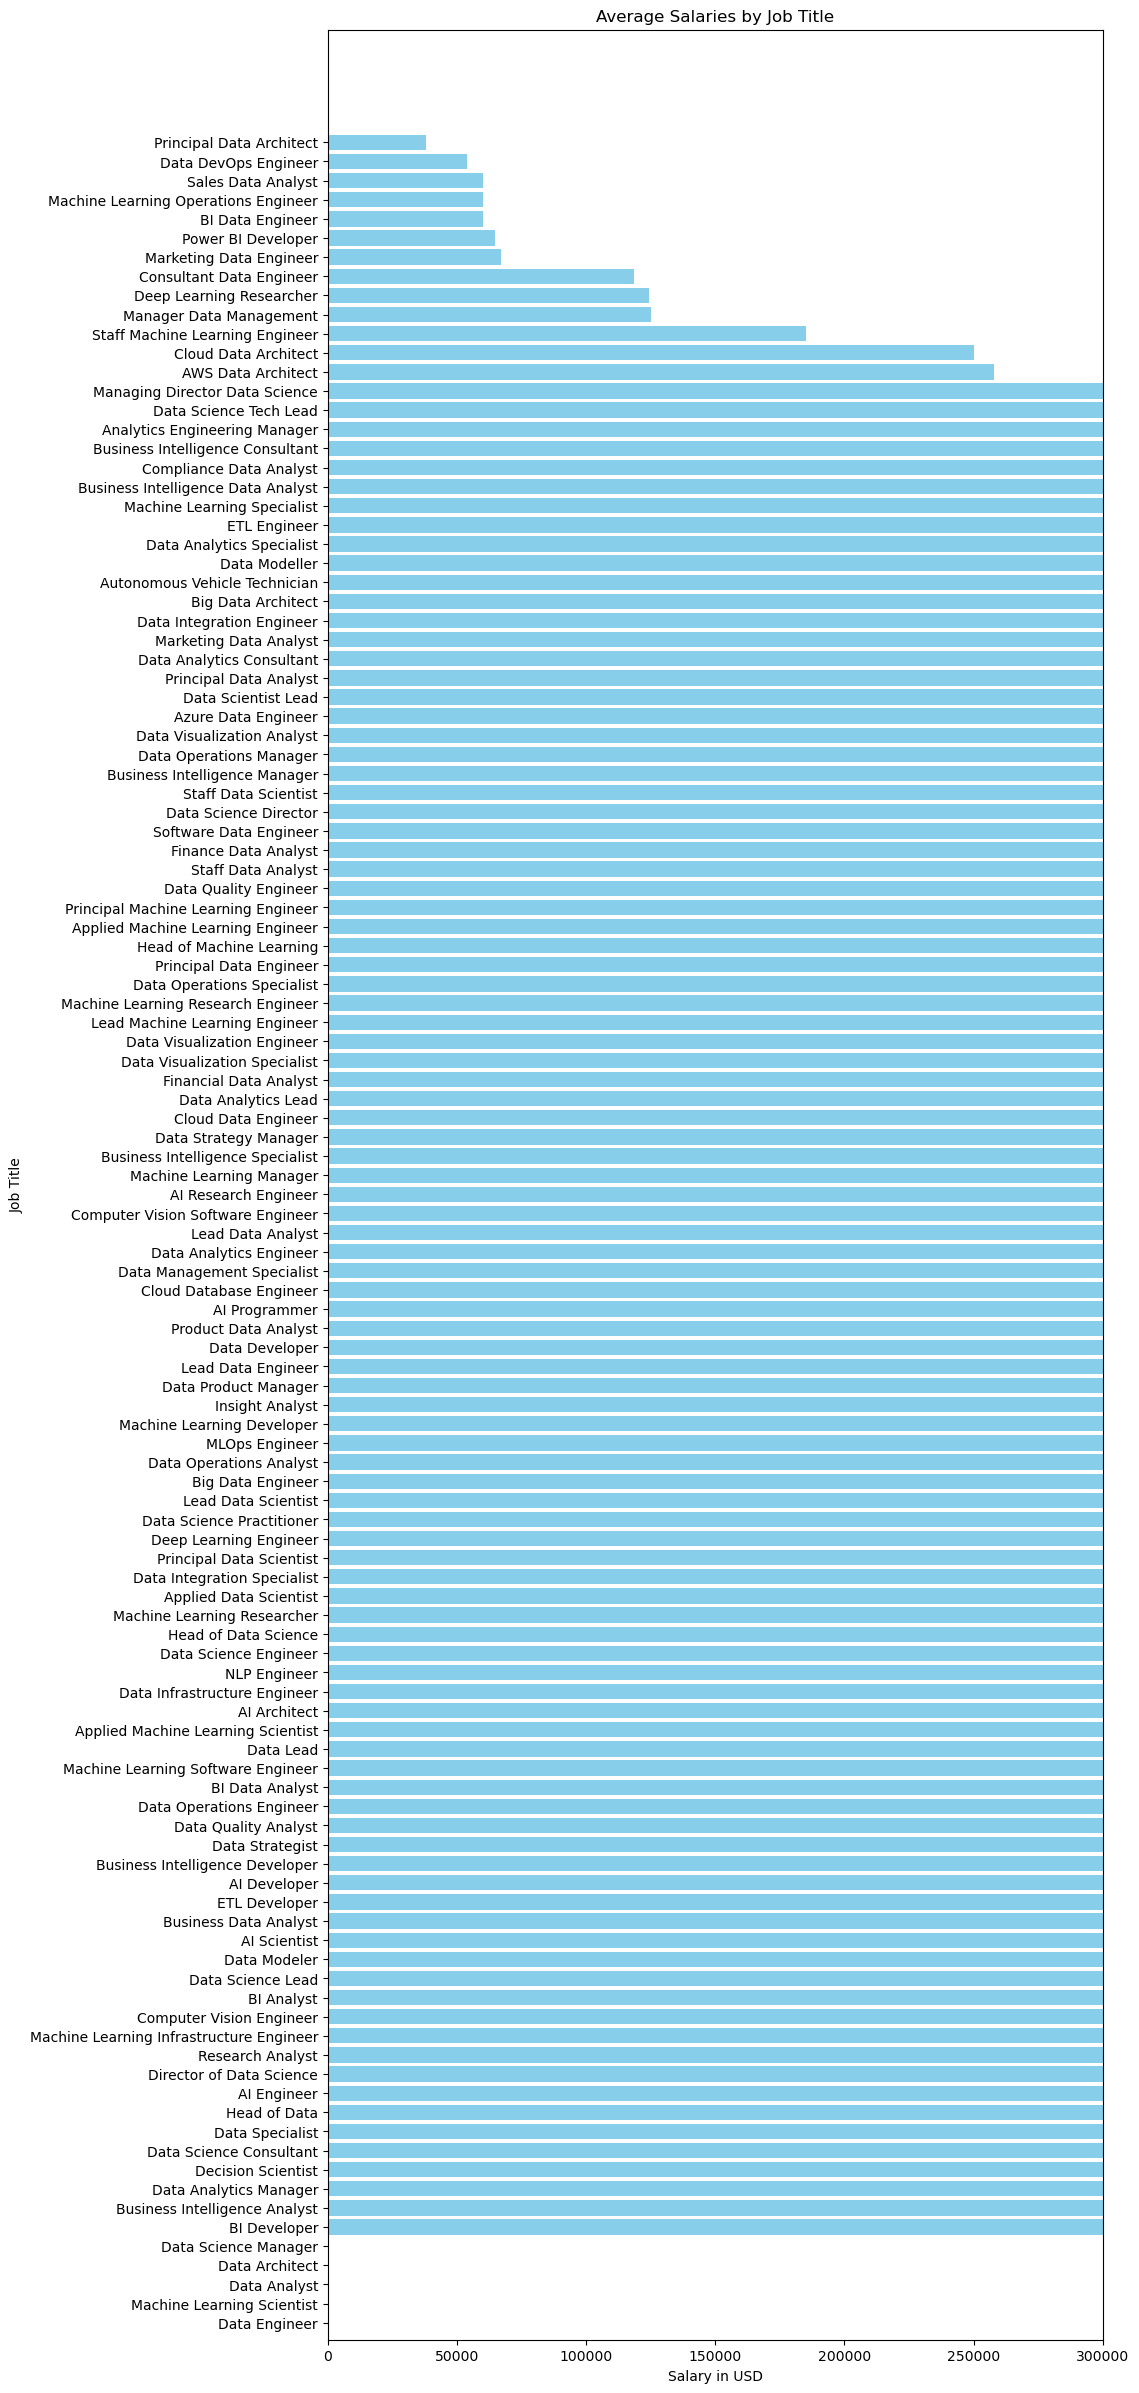

In [88]:

condition1 = new_df['work_year'] == '2023'
condition2 = new_df['experience_level'] == 'Senior'
condition3 = new_df['employment_type'] == 'FT'
combined_condition = condition2 & condition3
new_df = new_df[~combined_condition]
 
job_title_salaries = new_df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 30))
ax.barh(job_title_salaries.index, job_title_salaries.values, color='skyblue')
ax.set_xlim(0, 300000)
ax.set_title('Average Salaries by Job Title')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Job Title')
 
plt.show()


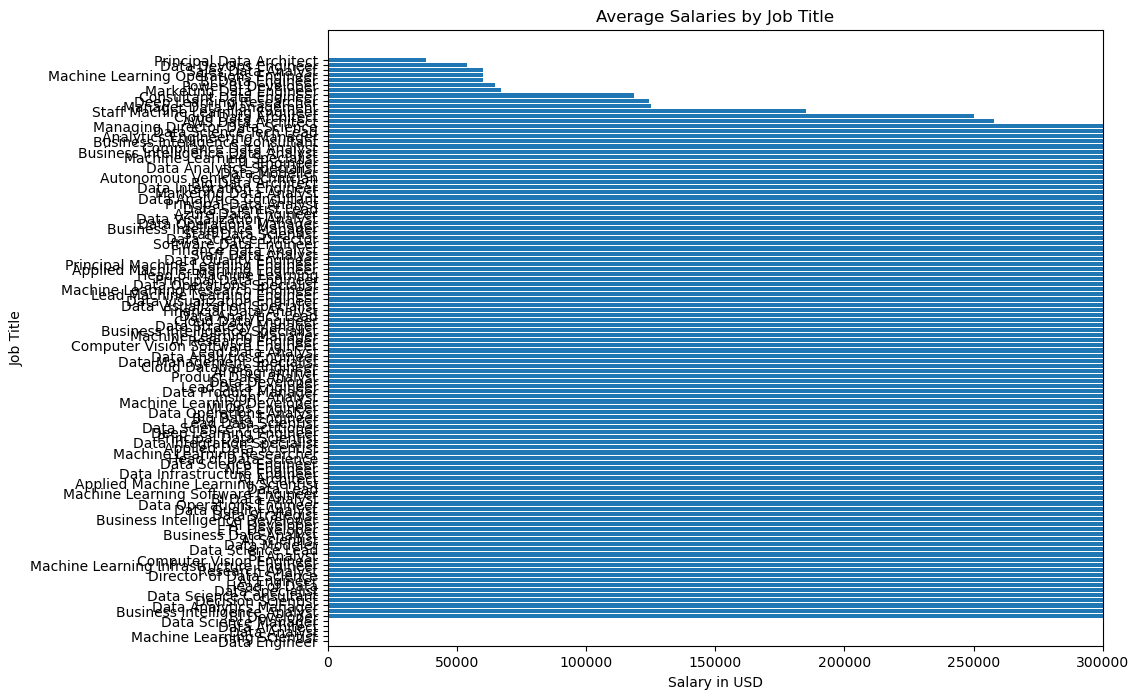

In [89]:
#salary mean
job_title_salaries = new_df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
#fig, ax = plt.subplots(figsize=(8, 20))
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(job_title_salaries.index, job_title_salaries.values)
ax.set_xlim(0, 300000)  
ax.set_title('Average Salaries by Job Title')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Job Title')
plt.show()

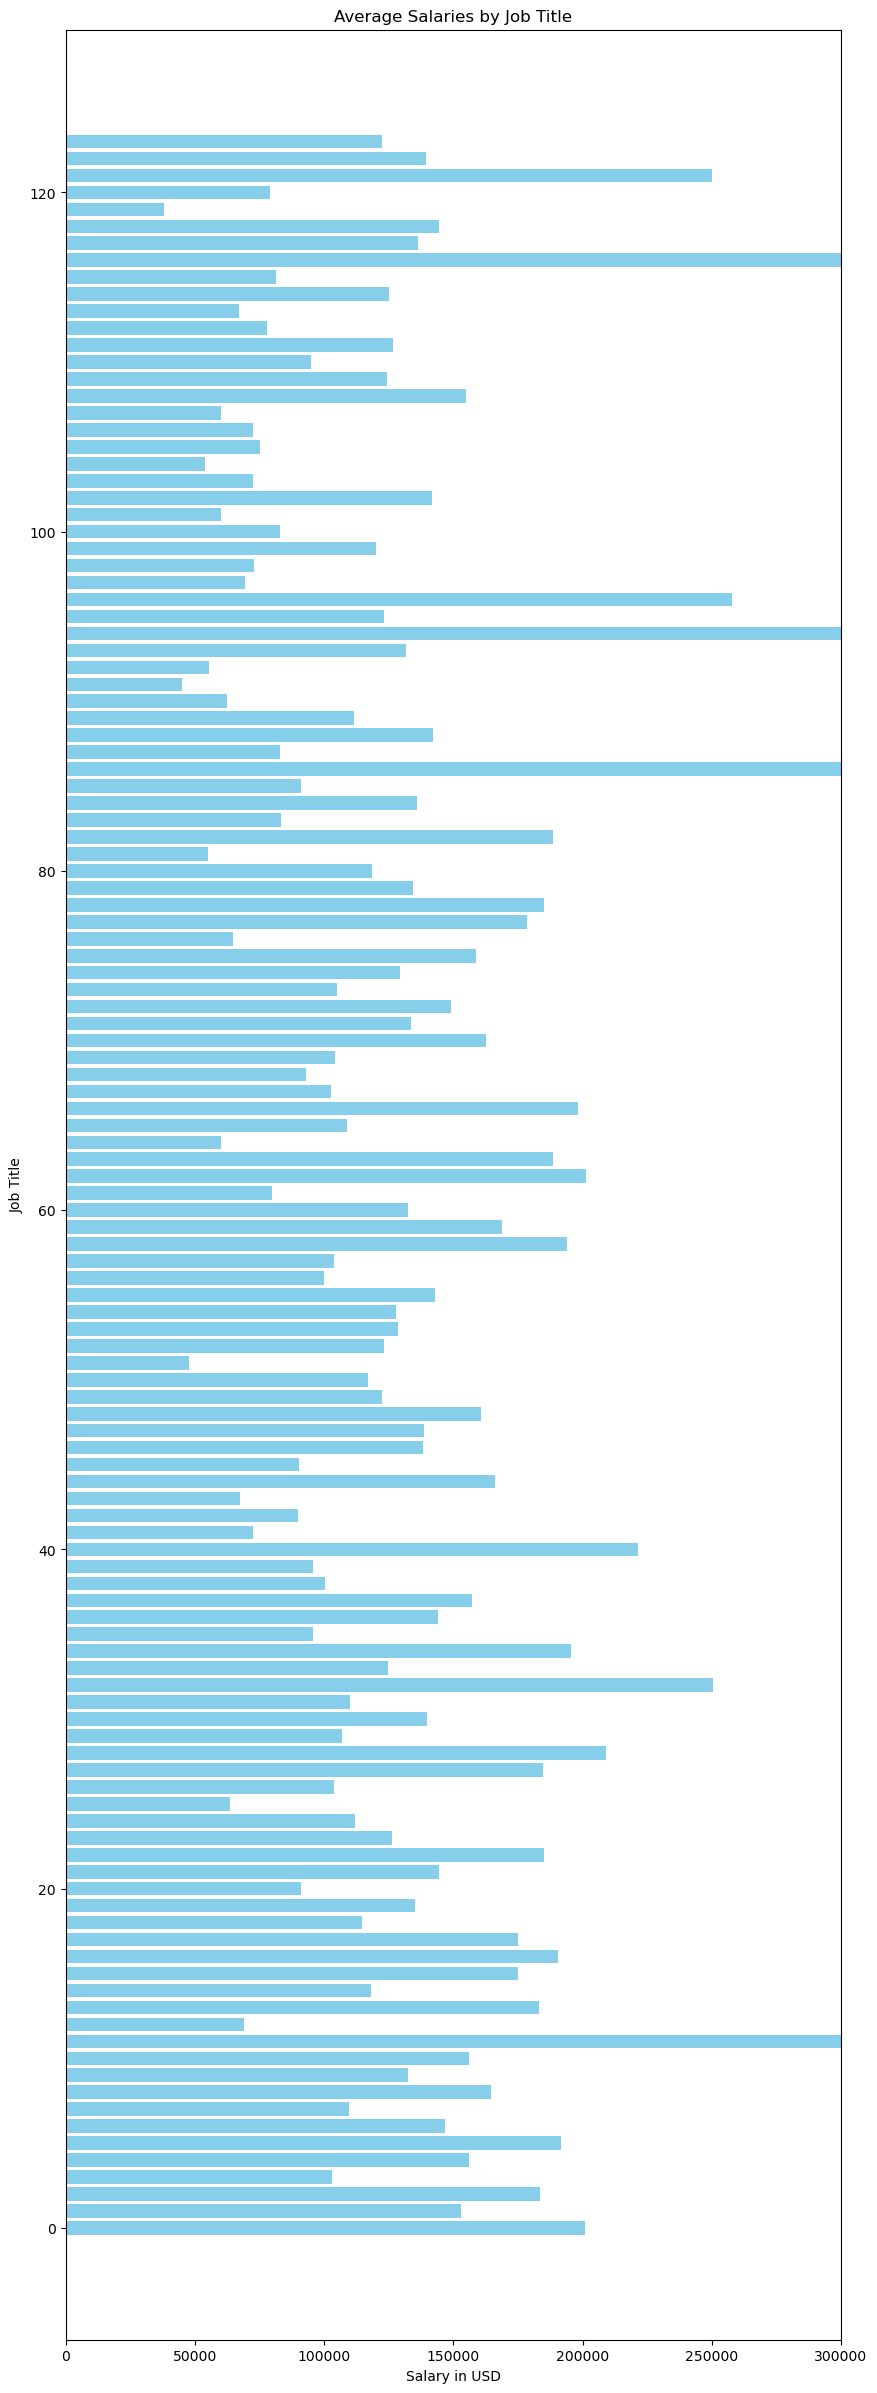

In [293]:

condition1 = new_df['work_year'] == '2023'
condition2 = new_df['experience_level'] == 'Senior'
condition3 = new_df['employment_type'] == 'FT'
 

combined_condition = condition2 & condition3

new_df = new_df[~combined_condition]

job_title_salaries = new_df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 30))
ax.barh(job_title_salaries.index, job_title_salaries.values, color='skyblue')
ax.set_xlim(0, 300000)
ax.set_title('Average Salaries by Job Title')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Job Title')
 

 
plt.show()


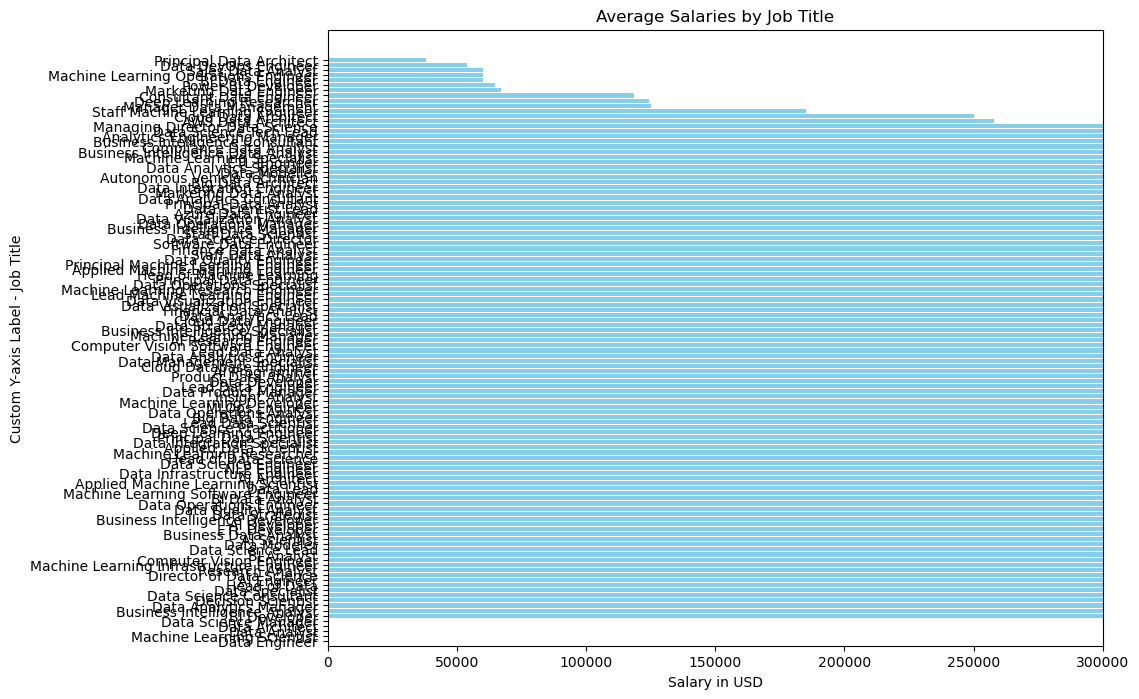

In [91]:
import pandas as pd
import matplotlib.pyplot as plt



condition1 = new_df['work_year'] == '2023'
condition2 = new_df['experience_level'] == 'Senior'
condition3 = new_df['employment_type'] == 'FT'

combined_condition = condition1 & condition2 & condition3


new_df = new_df[~combined_condition]

job_title_salaries = new_df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(job_title_salaries.index, job_title_salaries.values, color='skyblue')
ax.set_xlim(0, 300000)  
ax.set_title('Average Salaries by Job Title')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Custom Y-axis Label - Job Title')

plt.show()






In [92]:
new_df

,_id,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,657a1ce8a4f52c0babd77201,2023,EX,FT,Data Science Director,212000,US,0,US,M
1,657a1ce8a4f52c0babd77202,2023,EX,FT,Data Science Director,190000,US,0,US,M
2,657a1ce8a4f52c0babd77203,2023,MI,FT,Business Intelligence Engineer,43064,GB,0,GB,M
3,657a1ce8a4f52c0babd77204,2023,MI,FT,Business Intelligence Engineer,43064,GB,0,GB,M
4,657a1ce8a4f52c0babd77205,2023,SE,FT,Machine Learning Engineer,245700,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...
8800,657a1ce9a4f52c0babd79461,2020,SE,FT,Data Scientist,412000,US,100,US,L
8801,657a1ce9a4f52c0babd79462,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
8802,657a1ce9a4f52c0babd79463,2020,EN,FT,Data Scientist,105000,US,100,US,S
8803,657a1ce9a4f52c0babd79464,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


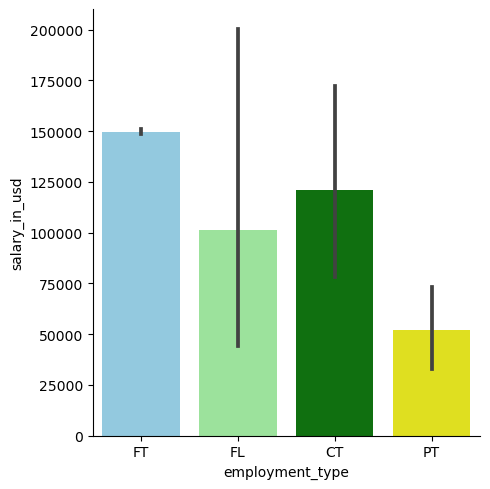

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

new_df['salary_in_usd'] = pd.to_numeric(new_df['salary_in_usd'], errors='coerce')

colors = ['skyblue', 'lightgreen', 'green', 'yellow']

sns.catplot(x="employment_type", y="salary_in_usd", kind="bar", data=new_df, palette=colors)
plt.show()


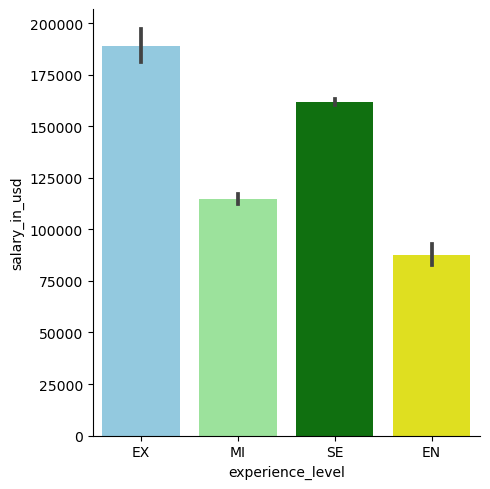

In [94]:

new_df['salary_in_usd'] = pd.to_numeric(new_df['salary_in_usd'], errors='coerce')

colors = ['skyblue', 'lightgreen', 'green', 'yellow']
sns.catplot(x="experience_level", y="salary_in_usd", kind="bar", data=new_df, palette=colors)
plt.show()


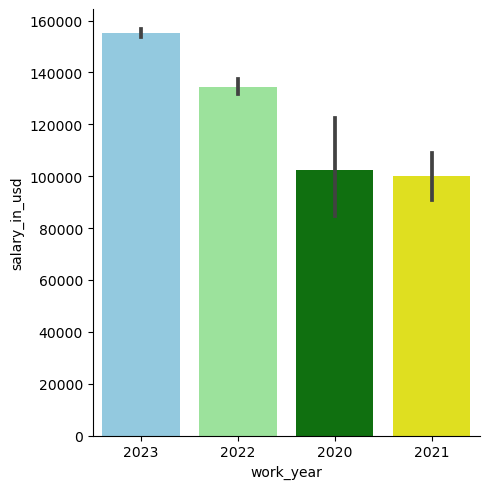

In [95]:


new_df['salary_in_usd'] = pd.to_numeric(new_df['salary_in_usd'], errors='coerce')

colors = ['skyblue', 'lightgreen', 'green', 'yellow']
sns.catplot(x="work_year", y="salary_in_usd", kind="bar", data=new_df, palette=colors)
plt.show()

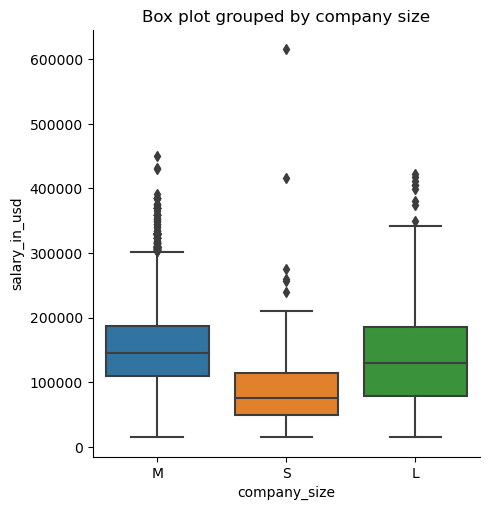

In [96]:
sns.catplot(x="company_size",y="salary_in_usd",kind="box",data=new_df)   
plt.title("Box plot grouped by company size")
plt.show()

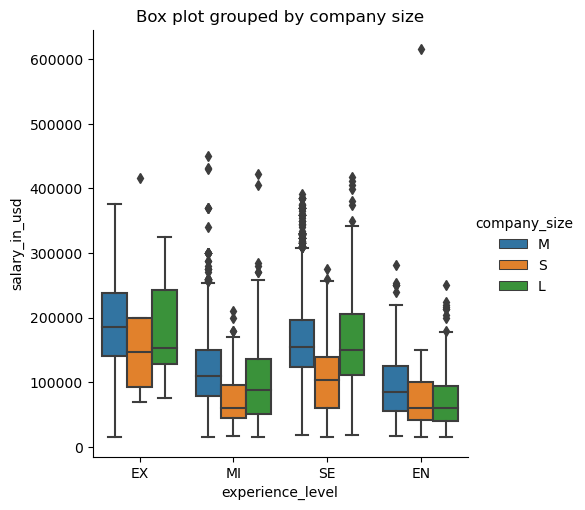

In [97]:
sns.catplot(x="experience_level",y="salary_in_usd",hue="company_size" ,kind="box",data=new_df)   
plt.title("Box plot grouped by company size")
plt.show()

In [98]:
plot_list=[i for i in new_df.select_dtypes("object")]

In [99]:
plot_list

['_id',
 'work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'company_location',
 'company_size']

In [100]:
for i in plot_list:
    new_df[i] = new_df[i].factorize()[0]

# correlation

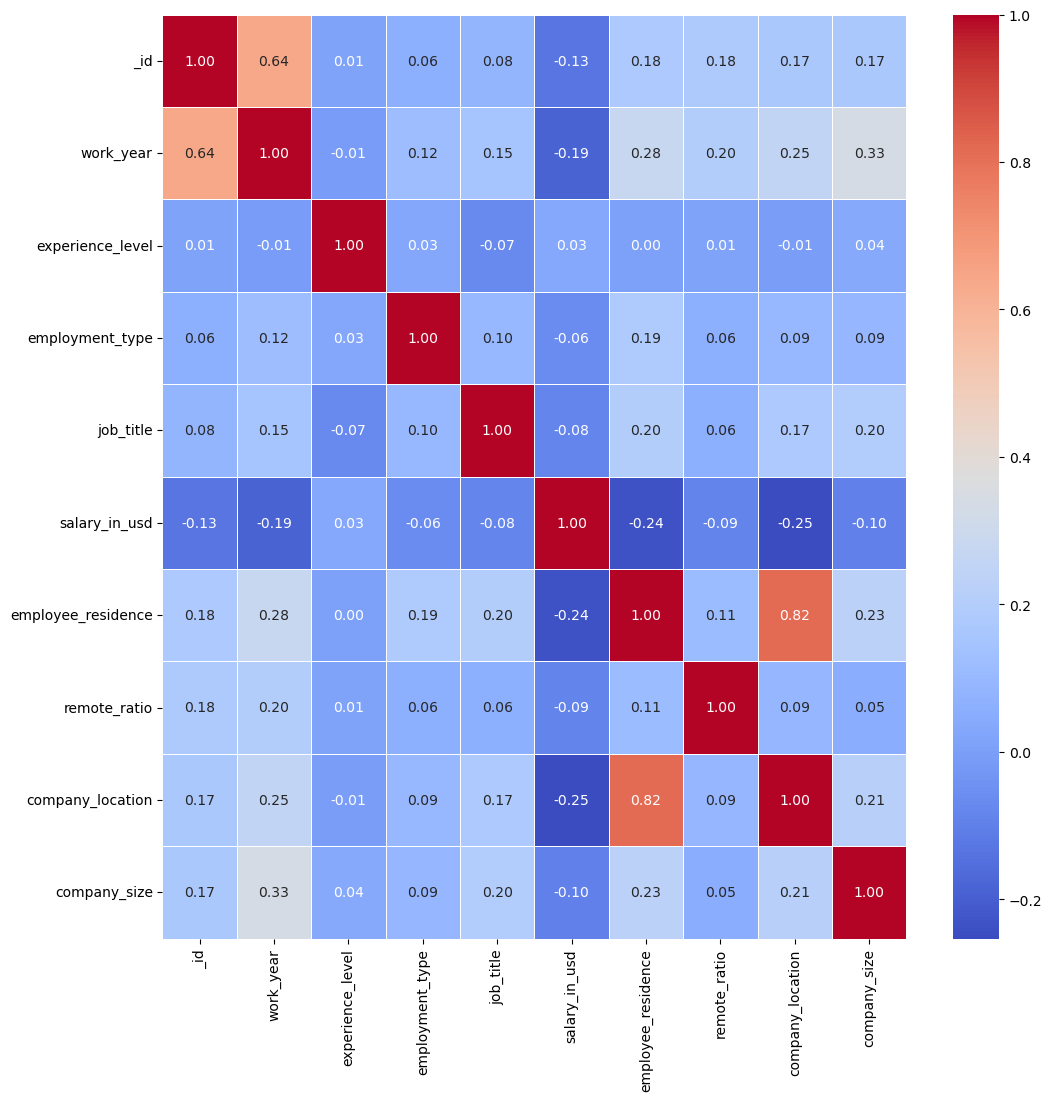

In [101]:
plt.figure(figsize=(12,12))
sns.heatmap(new_df.corr(),annot=True,linewidths=0.7,cmap="coolwarm",fmt=".2f")
plt.show()

In [219]:
X=new_df.drop(["work_year"], axis = 1)

In [220]:
Y=new_df["work_year"]

In [221]:
#X=new_df.drop(["remote_ratio"], axis = 1)
#X=new_df.drop(["employment_type"], axis = 1)

In [222]:
#Y=new_df["remote_ratio"]
#Y=new_df["employment_type"]

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [225]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6163, 9)
(2642, 9)
(6163,)
(2642,)


# Modeling

In [242]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [243]:
dt=DecisionTreeRegressor()

In [244]:
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [245]:
y_predict = dt.predict(X_test)

In [246]:
dt.score(X_train,Y_train)

1.0

In [247]:
dt.score(X_test,Y_test)

0.8509713083469956

In [263]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [275]:
print('MSE:',r2_score(Y_test, y_predict)*100)
print('MSE:',mean_squared_error(Y_test, y_predict))
print('MAE:',mean_absolute_error(Y_test, y_predict))
r_squared = r2_score(Y_test, y_predict)


print('R-squared:', r_squared)


r2 score: 85.09713083469957
MSE: 0.0582891748675246
MAE: 0.03936411809235428
R-squared: 0.8509713083469956


In [276]:

num_records, num_features = X_train.shape
feature_names = X_train.columns.tolist()

print("Number of Records in Training Data:", num_records)
print("Number of Features in Training Data:", num_features)
print("Feature Names in Training Data:", feature_names)

Number of Records in Training Data: 6163
Number of Features in Training Data: 9
Feature Names in Training Data: ['_id', 'experience_level', 'employment_type', 'job_title', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


In [277]:

num_records, num_features = X_test.shape
feature_names = X_test.columns.tolist()

print("Number of Records in Testing Data:", num_records)
print("Number of Features in Testing Data:", num_features)
print("Feature Names in Testing Data:", feature_names)




Number of Records in Testing Data: 2642
Number of Features in Testing Data: 9
Feature Names in Testing Data: ['_id', 'experience_level', 'employment_type', 'job_title', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


In [278]:
ridge=Ridge().fit(X_train,Y_train)
lasso=Lasso().fit(X_train,Y_train)
rf=RandomForestRegressor().fit(X_train,Y_train)


In [279]:
models=[ridge,lasso,rf]

In [284]:
def ML(Y,models):
    y_pred=models.predict(X_test)
    mse=mean_squared_error(Y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
    r2=r2_score(Y_test,y_pred)*100
    
    return mse,rmse,r2

In [288]:
for i in models:
    print("\n",i,"\n\nDifferent models success rate- MSE, RMSE, r2:",ML("salary_in_usd",i))


 Ridge() 

Different models success rate- MSE, RMSE, r2: (0.19633077138377605, 0.44309228314627197, 49.80385627855123)

 Lasso() 

Different models success rate- MSE, RMSE, r2: (0.22757681279895559, 0.4770501156052219, 41.81514022274347)

 RandomForestRegressor() 

Different models success rate- MSE, RMSE, r2: (0.03772339137017411, 0.1942251048916543, 90.35521145497727)


# DATASET 02 -  STRUCTURED DATA(CSV)

# USA Data Scientist Job Salary Analysis

 The below performed dataset is all about the US based data scientist employee salaries connected with the industry details and company size and location features

In [294]:
dataset 2


SyntaxError: invalid syntax (3453770548.py, line 1)